In [149]:
import pandas as pd
import geopandas as gpd
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from shapely import geometry
from shapely.geometry import Point
from shapely.ops import transform
import geopandas
import shapely as shp
import numpy as np
import pyproj
from sklearn.neighbors import BallTree
import warnings
warnings.filterwarnings("ignore")
from varname import nameof
import json
import statistics
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
from scipy.stats.stats import pearsonr
import association_metrics as am
from scipy.stats import chi2_contingency
import researchpy
from dython.nominal import associations, numerical_encoding

In [150]:
data = pd.read_excel("00._v3_Observations_-_to_normalize.xlsx") #This is a copy of the usual 'Observations' excel file
data

,Unnamed: 0,index,Interview ID,Village,lat,long,"long,lat",num_val,cookstove,age,...,Luminance Band 1,DHS Cluster,Q1,Q2,Q3,Q4,Q5,Travel Time (min),Precipitation (mm),Unnamed: 42
0,12,12,6064593ca2237b3f546900e5,Mabwe,0.595131,30.153128,"(30.15312827, 0.5951310726)",1,1,20,...,15,532,0.000000,0.107143,0.357143,0.321429,0.214286,24,1482.106567,0.472864
1,1,1,606459aea2237b3f546905ed,Gwere,3.267508,33.208864,"(33.20886406, 3.267508412)",1,1,26,...,19,392,0.962963,0.037037,0.000000,0.000000,0.000000,49,1432.603027,0.490080
2,88,88,60d06f4fdefc3909beb5899c,Kanyansi,1.052800,30.540100,"(30.5401, 1.0528)",1,0,52,...,15,502,0.181818,0.454545,0.272727,0.090909,0.000000,27,1543.972046,0.348018
3,102,102,60d06f51defc3909beb589a2,Kagera,0.264200,30.108400,"(30.1084, 0.2642)",1,0,36,...,15,542,0.000000,0.000000,0.275862,0.206897,0.517241,13,977.963806,0.751050
4,37,122,60d06f39defc3909beb58979,Kireka zone,0.398700,32.479300,"(32.4793, 0.3987)",0,0,60,...,255,88,0.000000,0.035714,0.178571,0.250000,0.535714,0,1312.302734,0.861109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,14,54,60d06f6adefc3909beb589cd,Katooke,0.609300,30.640100,"(30.6401, 0.6093)",0,0,35,...,115,521,0.090909,0.136364,0.227273,0.363636,0.181818,50,1484.115845,0.202328
195,104,104,60d06f7ddefc3909beb589d8,Katumba,0.589700,30.254900,"(30.2549, 0.5897)",1,0,29,...,12,557,0.000000,0.107143,0.250000,0.428571,0.214286,10,1247.092651,0.182412
196,141,141,60d06f81defc3909beb589e5,Mugooma,0.654600,30.280100,"(30.2801, 0.6546)",1,0,41,...,15,530,0.000000,0.160000,0.280000,0.200000,0.360000,0,1519.300537,0.834835
197,29,94,606458e7a2237b3f5468fd5b,Lama,3.668252,31.926040,"(31.92603986, 3.668252174)",0,0,26,...,11,427,0.437500,0.250000,0.187500,0.125000,0.000000,67,1322.122192,0.951205


# All Numerical Parameters - Pearson's
p-value: https://stackoverflow.com/questions/52741236/how-to-calculate-p-values-for-pairwise-correlation-of-columns-in-pandas
         https://www.youtube.com/watch?v=TRNaMGkdn-A
         https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [151]:
no_people_house_list      = MinMaxScaler().fit_transform(data[['no_people_in_household']])
age_list                  = MinMaxScaler().fit_transform(data[['age']])
g5_list                   = MinMaxScaler().fit_transform(data[['Q5']])
g4_list                   = MinMaxScaler().fit_transform(data[['Q4']])
g3_list                   = MinMaxScaler().fit_transform(data[['Q3']])
g2_list                   = MinMaxScaler().fit_transform(data[['Q2']])
g1_list                   = MinMaxScaler().fit_transform(data[['Q1']])
precipitation_mm_list     = MinMaxScaler().fit_transform(data[['Precipitation (mm)']])
travel_time_min_list      = MinMaxScaler().fit_transform(data[['Travel Time (min)']])
luminance_list            = MinMaxScaler().fit_transform(data[['Luminance']])
nat_road_km_list          = MinMaxScaler().fit_transform(data[['Closest National Road (km)']])
nat_sub_road_km_list      = MinMaxScaler().fit_transform(data[['Closest Nat/Subnat Road (km)']])
trans_sub_km_list         = MinMaxScaler().fit_transform(data[['Closest Trans. Substation (km)']])
dist_sub_km_list          = MinMaxScaler().fit_transform(data[['Closest Distr. Substation (km)']])
closest_forest_km_list    = MinMaxScaler().fit_transform(data[['Closest forest (km)']])
closest_small_forest_list = MinMaxScaler().fit_transform(data[['Closest smallest forest radius (km)']])
deforestation_list        = MinMaxScaler().fit_transform(data[['Grade of Deforestation']])
forest_all_list           = MinMaxScaler().fit_transform(data[['Presence of forests (all)']])
forests_no_reserves_list  = MinMaxScaler().fit_transform(data[['Presence of forests (no reserves)']])
fuel_station_km_list      = MinMaxScaler().fit_transform(data[['Closest Fuel Station (km)']])
closest_lake_list         = MinMaxScaler().fit_transform(data[['Closest lake (km)']])
closest_river_list        = MinMaxScaler().fit_transform(data[['Closest Rivers (km)']])

In [152]:
numerical_data_norm = pd.DataFrame(no_people_house_list, columns = ['members_house'])
numerical_data_norm.insert(0, 'age', age_list)
numerical_data_norm.insert(0, 'g5', g5_list)
numerical_data_norm.insert(0, 'g4', g4_list)
numerical_data_norm.insert(0, 'g3', g3_list)
numerical_data_norm.insert(0, 'g2', g2_list)
numerical_data_norm.insert(0, 'g1', g1_list)
numerical_data_norm.insert(0, 'precipitation', precipitation_mm_list)
numerical_data_norm.insert(0, 'travel_time', travel_time_min_list)
numerical_data_norm.insert(0, 'luminance', luminance_list)
numerical_data_norm.insert(0, 'nat_road_dist', nat_road_km_list)
numerical_data_norm.insert(0, 'nat_sub_road_dist', nat_sub_road_km_list)
numerical_data_norm.insert(0, 'transmission', trans_sub_km_list)
numerical_data_norm.insert(0, 'distribution', dist_sub_km_list)
numerical_data_norm.insert(0, 'close_forest', closest_forest_km_list)
numerical_data_norm.insert(0, 'small_forest', closest_small_forest_list)
numerical_data_norm.insert(0, 'deforestation', deforestation_list)
numerical_data_norm.insert(0, 'forest', forest_all_list)
numerical_data_norm.insert(0, 'forest_no_res', forests_no_reserves_list)
numerical_data_norm.insert(0, 'fuel_station', fuel_station_km_list)
numerical_data_norm.insert(0, 'closest_lake', closest_lake_list)
numerical_data_norm.insert(0, 'closest_river', closest_river_list)

numerical_data_norm

,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,transmission,...,luminance,travel_time,precipitation,g1,g2,g3,g4,g5,age,members_house
0,0.186985,0.118218,0.328202,0.285472,0.498311,0.498688,0.140796,0.360592,0.100563,0.149200,...,0.071560,0.201681,0.574526,0.000000,0.198980,0.928571,0.696429,0.400000,0.032258,0.117647
1,0.241730,1.000000,0.840992,0.331482,0.119031,0.000000,0.567061,1.000000,0.215052,0.481820,...,0.104464,0.411765,0.526399,1.000000,0.068783,0.000000,0.000000,0.000000,0.129032,0.176471
2,1.000000,0.000000,0.714594,0.110972,0.057162,0.137135,0.000000,0.000000,0.254697,0.394831,...,0.074054,0.226891,0.634671,0.188811,0.844156,0.709091,0.196970,0.000000,0.548387,0.176471
3,0.045416,0.146384,0.231321,0.171018,0.168361,0.257010,0.063711,0.238637,0.001509,0.000000,...,0.074054,0.109244,0.084403,0.000000,0.000000,0.717241,0.448276,0.965517,0.290323,0.411765
4,0.355643,0.101878,0.064511,0.319828,0.085626,0.702228,0.321310,0.722815,0.033745,0.023504,...,0.069113,0.000000,0.409444,0.000000,0.066327,0.464286,0.541667,1.000000,0.677419,0.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.854847,0.262508,0.010697,0.460605,0.201809,1.000000,0.439255,0.165103,0.092659,0.189688,...,1.000000,0.420168,0.576479,0.094406,0.253247,0.590909,0.787879,0.339394,0.274194,0.176471
195,0.094514,0.074970,0.161029,0.313649,0.127262,0.649390,0.380445,0.727434,0.046046,0.158278,...,0.053492,0.084034,0.346047,0.000000,0.198980,0.650000,0.928571,0.400000,0.177419,0.235294
196,0.034888,0.115455,0.005541,0.335311,0.177492,0.652656,0.119670,0.003707,0.008183,0.189798,...,0.063328,0.000000,0.610685,0.000000,0.297143,0.728000,0.433333,0.672000,0.370968,0.470588
197,0.285037,0.083565,0.527377,0.367126,0.334708,0.036128,0.579234,0.000000,0.655243,0.773599,...,0.041981,0.563025,0.418990,0.454327,0.464286,0.487500,0.270833,0.000000,0.129032,0.294118


In [153]:
#Pearson coefficient

pearsoncorr = numerical_data_norm.corr(method='pearson')
pearsoncorr

,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,transmission,...,luminance,travel_time,precipitation,g1,g2,g3,g4,g5,age,members_house
closest_river,1.000000,0.004968,0.346512,-0.203006,-0.217960,-0.248978,-0.053263,-0.289436,0.187491,0.185657,...,0.417345,0.051638,0.229329,0.196038,0.495135,-0.065751,-0.410496,-0.364423,0.105086,-0.017898
closest_lake,0.004968,1.000000,0.581884,0.241402,0.009404,-0.450144,0.435686,0.364628,0.314550,0.399814,...,0.093038,0.333940,0.323820,0.836704,-0.055627,-0.771910,-0.601317,-0.358808,0.280086,0.105708
fuel_station,0.346512,0.581884,1.000000,0.126719,0.055986,-0.555172,0.350048,0.048654,0.361211,0.394061,...,-0.192154,0.457153,0.543590,0.644221,0.457556,-0.604552,-0.639927,-0.555174,0.137093,0.122870
forest_no_res,-0.203006,0.241402,0.126719,1.000000,0.831721,0.070804,0.624167,-0.191098,0.065000,0.132668,...,0.009798,0.763815,0.502492,-0.026800,0.250476,-0.242987,0.097199,-0.111386,0.110445,0.134680
forest,-0.217960,0.009404,0.055986,0.831721,1.000000,0.065938,0.359932,-0.334534,-0.021751,0.013320,...,-0.111384,0.744664,0.324550,-0.223666,0.162586,0.144451,0.194833,-0.030894,-0.018662,0.110595
deforestation,-0.248978,-0.450144,-0.555172,0.070804,0.065938,1.000000,-0.263943,0.177443,-0.559744,-0.534177,...,0.283894,-0.260388,-0.046255,-0.676641,-0.273804,0.535329,0.749319,0.385615,-0.233224,-0.133281
small_forest,-0.053263,0.435686,0.350048,0.624167,0.359932,-0.263943,1.000000,0.000228,0.232511,0.287211,...,0.035276,0.611515,0.362153,0.317946,0.263137,-0.660441,-0.190294,-0.185732,0.224214,0.107617
close_forest,-0.289436,0.364628,0.048654,-0.191098,-0.334534,0.177443,0.000228,1.000000,-0.173081,-0.103259,...,-0.078042,-0.225916,-0.256548,0.250544,-0.531505,-0.182698,0.254674,-0.092997,0.031592,-0.130502
distribution,0.187491,0.314550,0.361211,0.065000,-0.021751,-0.559744,0.232511,-0.173081,1.000000,0.951870,...,-0.088342,0.361191,0.195134,0.669611,0.151237,-0.452434,-0.455376,-0.603772,0.247064,-0.009916
transmission,0.185657,0.399814,0.394061,0.132668,0.013320,-0.534177,0.287211,-0.103259,0.951870,1.000000,...,-0.061906,0.463402,0.262801,0.733877,0.104319,-0.479721,-0.455804,-0.658609,0.261198,-0.028483


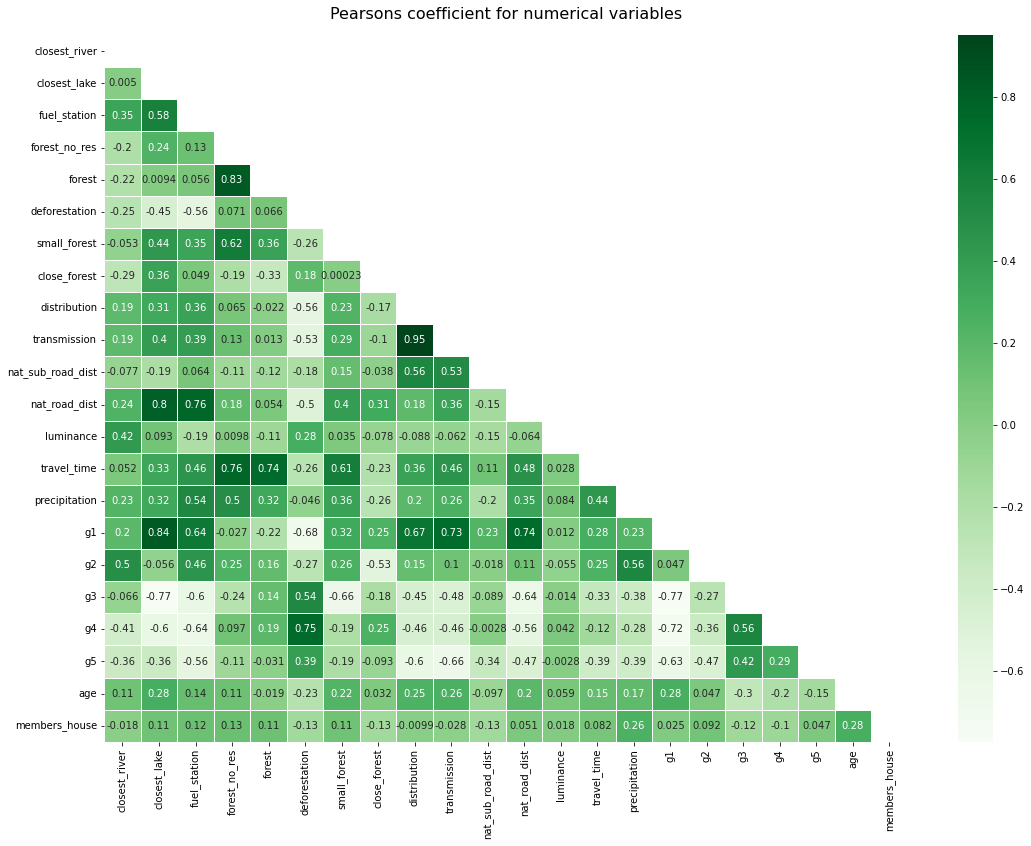

In [154]:
#Plot Pearson's coefficient

plt.figure(figsize=(18, 13))

mapa = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            mask = np.triu(np.ones_like(pearsoncorr, dtype=bool)),
            cmap='Greens',
            annot=True,
            linewidth=0.5)

mapa.set_title('Pearsons coefficient for numerical variables', fontdict={'fontsize':16}, pad=16); #This semicolon prevents a message to be plotted 
plt.savefig('heatmap_numerical_pearson.jpg', dpi=500, bbox_inches='tight')

In [155]:
# Pearson coefficient - p-values

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

pearson_p_values = numerical_data_norm.corr(method=pearsonr_pval)
pearson_p_values

,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,transmission,...,luminance,travel_time,precipitation,g1,g2,g3,g4,g5,age,members_house
closest_river,1.000000e+00,9.444811e-01,5.343436e-07,4.031048e-03,1.984098e-03,3.909037e-04,4.549624e-01,3.377858e-05,8.006834e-03,8.655193e-03,...,8.654435e-10,4.688585e-01,1.121049e-03,5.519830e-03,1.051350e-13,3.561711e-01,1.724747e-09,1.212920e-07,0.139628,0.801888
closest_lake,9.444811e-01,1.000000e+00,2.002554e-19,5.928124e-04,8.951180e-01,2.547624e-11,1.262659e-10,1.191938e-07,6.048260e-06,4.904194e-09,...,1.912005e-01,1.434011e-06,3.077255e-06,2.073009e-53,4.351660e-01,1.288713e-40,5.944417e-21,1.949823e-07,0.000062,0.137289
fuel_station,5.343436e-07,2.002554e-19,1.000000e+00,7.450020e-02,4.322085e-01,1.745933e-17,4.016137e-07,4.949706e-01,1.593175e-07,8.480986e-09,...,6.548385e-03,1.140751e-11,1.073262e-16,1.012505e-24,1.088596e-11,3.233437e-21,2.567981e-24,1.745373e-17,0.053498,0.083821
forest_no_res,4.031048e-03,5.928124e-04,7.450020e-02,1.000000e+00,3.081025e-52,3.203371e-01,6.912736e-23,6.856226e-03,3.617054e-01,6.176425e-02,...,8.907494e-01,2.574211e-39,3.959142e-14,7.071036e-01,3.594501e-04,5.439195e-04,1.720133e-01,1.172840e-01,0.120434,0.057884
forest,1.984098e-03,8.951180e-01,4.322085e-01,3.081025e-52,1.000000e+00,3.548020e-01,1.774438e-07,1.369943e-06,7.604157e-01,8.518715e-01,...,1.172911e-01,1.948316e-36,2.915070e-06,1.495007e-03,2.176792e-02,4.179214e-02,5.822280e-03,6.648898e-01,0.793614,0.119926
deforestation,3.909037e-04,2.547624e-11,1.745933e-17,3.203371e-01,3.548020e-01,1.000000e+00,1.652656e-04,1.216585e-02,8.360287e-18,4.463012e-16,...,4.833978e-05,2.037189e-04,5.165067e-01,5.402590e-28,9.108326e-05,3.757703e-16,4.110567e-37,1.859890e-08,0.000916,0.060559
small_forest,4.549624e-01,1.262659e-10,4.016137e-07,6.912736e-23,1.774438e-07,1.652656e-04,1.000000e+00,9.974477e-01,9.507455e-04,3.904201e-05,...,6.208507e-01,8.513153e-22,1.471138e-07,4.734083e-06,1.733353e-04,2.622680e-26,7.099123e-03,8.627987e-03,0.001454,0.130290
close_forest,3.377858e-05,1.191938e-07,4.949706e-01,6.856226e-03,1.369943e-06,1.216585e-02,9.974477e-01,1.000000e+00,1.449704e-02,1.466824e-01,...,2.732295e-01,1.334553e-03,2.545237e-04,3.580933e-04,6.635039e-16,9.799705e-03,2.833939e-04,1.914004e-01,0.657797,0.066176
distribution,8.006834e-03,6.048260e-06,1.593175e-07,3.617054e-01,7.604157e-01,8.360287e-18,9.507455e-04,1.449704e-02,1.000000e+00,4.002587e-103,...,2.146819e-01,1.595848e-07,5.745497e-03,3.001684e-27,3.298228e-02,1.963381e-11,1.400928e-11,3.746850e-21,0.000435,0.889444
transmission,8.655193e-03,4.904194e-09,8.480986e-09,6.176425e-02,8.518715e-01,4.463012e-16,3.904201e-05,1.466824e-01,4.002587e-103,1.000000e+00,...,3.850511e-01,5.486437e-12,1.768019e-04,6.318119e-35,1.425565e-01,7.553218e-13,1.333418e-11,4.007587e-26,0.000194,0.689633


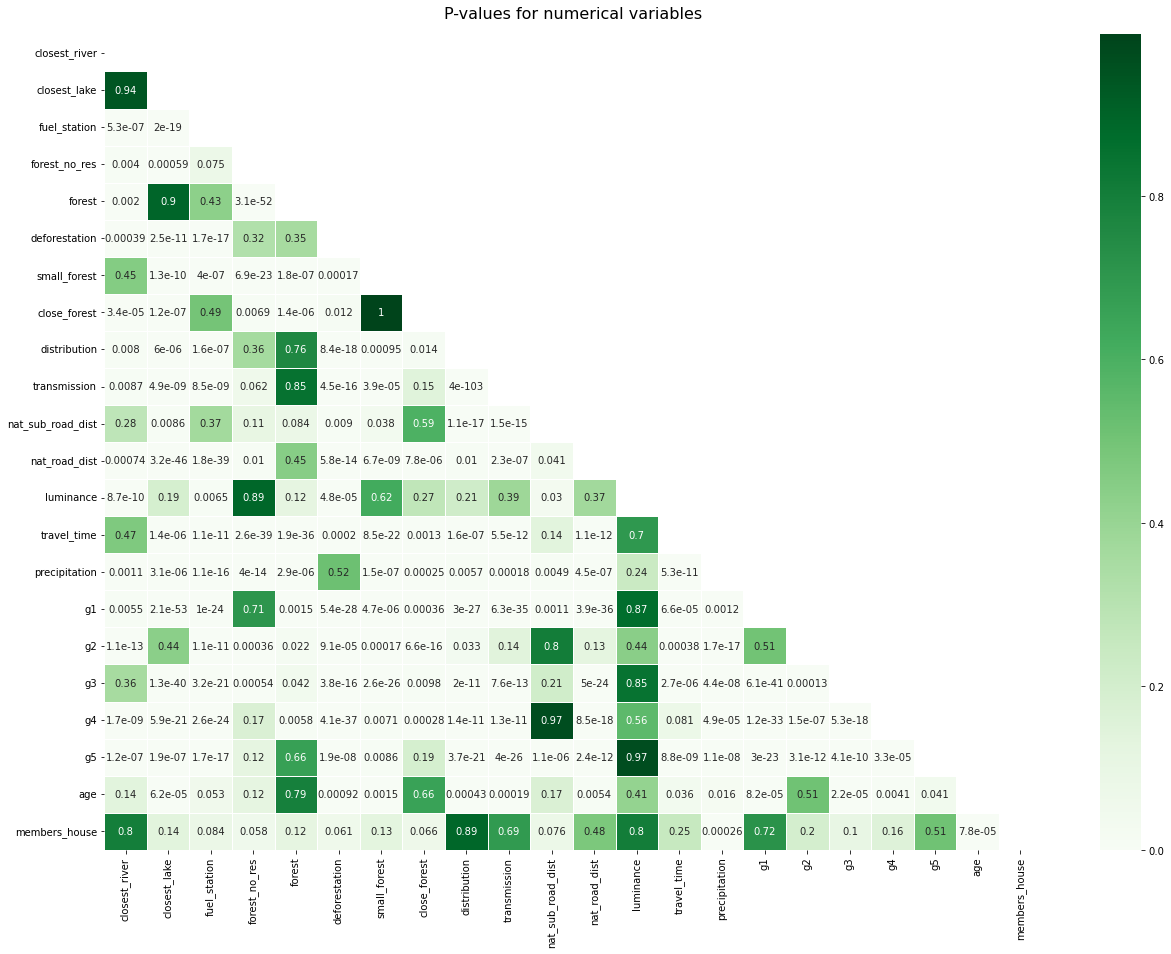

In [156]:
#Plot p-values

plt.figure(figsize=(21, 15))

mapa = sb.heatmap(pearson_p_values, 
            xticklabels=pearson_p_values.columns,
            yticklabels=pearson_p_values.columns,
            mask = np.triu(np.ones_like(pearson_p_values, dtype=bool)),
            cmap='Greens',
            annot=True,
            linewidth=0.5)

mapa.set_title('P-values for numerical variables', fontdict={'fontsize':16}, pad=16); #This semicolon prevents a message to appear 
plt.savefig('heatmap_numerical_pvalues.jpg', dpi=500, bbox_inches='tight')

# All Categorical Parameters (with num_val/cookstove) - Cramer's V

In [157]:
#VALUES

num_val                             = data['num_val'].tolist()
cookstove                             = data['cookstove'].tolist()

toilet_type_list                    = data['toilet_type'].tolist()
water_source_list                   = data['water_source'].tolist()
type_of_fuel_list                   = data['type_of_fuel'].tolist()
distance_fetch_water_one_way_list   = data['distance_fetch_water_one_way'].tolist()
highest_grade_completed_list        = data['highest_grade_completed'].tolist()
sex_list                            = data['sex'].tolist()
land_cover_list                     = data['Land Cover'].tolist()

In [158]:
#VALUES

categorical_data = pd.DataFrame(num_val, columns = ['num_val'])

categorical_data.insert(0, 'cookstove',cookstove)
categorical_data.insert(0, 'toilet', toilet_type_list)
categorical_data.insert(0, 'water', water_source_list)
categorical_data.insert(0, 'fuel', type_of_fuel_list)
categorical_data.insert(0, 'distance_water', distance_fetch_water_one_way_list)
categorical_data.insert(0, 'grade', highest_grade_completed_list)
categorical_data.insert(0, 'sex', sex_list)
categorical_data.insert(0, 'land_cover', land_cover_list)

categorical_data

,land_cover,sex,grade,distance_water,fuel,water,toilet,cookstove,num_val
0,40,0,1,4,3,9,5,1,1
1,50,0,1,4,1,1,2,1,1
2,50,0,2,6,1,3,2,0,1
3,40,0,2,6,3,1,2,0,1
4,50,1,4,5,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...
194,30,0,1,5,1,3,2,0,0
195,20,0,1,5,1,3,2,0,1
196,50,0,2,6,1,1,2,0,1
197,126,1,0,3,1,7,1,0,0


In [159]:
#Have the final list for the Machine Learning Algorithm

num_cate_all = pd.concat([numerical_data_norm, categorical_data], axis=1)
num_cate_all.to_excel("ML_Ready_for_Algorithms.xlsx")
num_cate_all

,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,transmission,...,members_house,land_cover,sex,grade,distance_water,fuel,water,toilet,cookstove,num_val
0,0.186985,0.118218,0.328202,0.285472,0.498311,0.498688,0.140796,0.360592,0.100563,0.149200,...,0.117647,40,0,1,4,3,9,5,1,1
1,0.241730,1.000000,0.840992,0.331482,0.119031,0.000000,0.567061,1.000000,0.215052,0.481820,...,0.176471,50,0,1,4,1,1,2,1,1
2,1.000000,0.000000,0.714594,0.110972,0.057162,0.137135,0.000000,0.000000,0.254697,0.394831,...,0.176471,50,0,2,6,1,3,2,0,1
3,0.045416,0.146384,0.231321,0.171018,0.168361,0.257010,0.063711,0.238637,0.001509,0.000000,...,0.411765,40,0,2,6,3,1,2,0,1
4,0.355643,0.101878,0.064511,0.319828,0.085626,0.702228,0.321310,0.722815,0.033745,0.023504,...,0.529412,50,1,4,5,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.854847,0.262508,0.010697,0.460605,0.201809,1.000000,0.439255,0.165103,0.092659,0.189688,...,0.176471,30,0,1,5,1,3,2,0,0
195,0.094514,0.074970,0.161029,0.313649,0.127262,0.649390,0.380445,0.727434,0.046046,0.158278,...,0.235294,20,0,1,5,1,3,2,0,1
196,0.034888,0.115455,0.005541,0.335311,0.177492,0.652656,0.119670,0.003707,0.008183,0.189798,...,0.470588,50,0,2,6,1,1,2,0,1
197,0.285037,0.083565,0.527377,0.367126,0.334708,0.036128,0.579234,0.000000,0.655243,0.773599,...,0.294118,126,1,0,3,1,7,1,0,0


In [160]:
# Convert all columns into categorical variables
#https://pandas.pydata.org/docs/user_guide/categorical.html
#VALUES

categorical_data["num_val"] = categorical_data["num_val"].astype("category")
categorical_data["cookstove"] = categorical_data["cookstove"].astype("category")

categorical_data["toilet"] = categorical_data["toilet"].astype("category")
categorical_data["water"] = categorical_data["water"].astype("category")
categorical_data["fuel"] = categorical_data["fuel"].astype("category")
categorical_data["distance_water"] = categorical_data["distance_water"].astype("category")
categorical_data["grade"] = categorical_data["grade"].astype("category")
categorical_data["sex"] = categorical_data["sex"].astype("category")
categorical_data["land_cover"] = categorical_data["land_cover"].astype("category")

In [161]:
#https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas
#https://www.youtube.com/watch?v=hTsxJqw2zMM

factors_paired = [(i,j) for i in categorical_data.columns.values for j in categorical_data.columns.values] 

chi2, p_values, cramers =[], [], []

for f in factors_paired:
    if f[0] != f[1]:
        crosstab, res, exp = researchpy.crosstab(categorical_data[f[0]], categorical_data[f[1]], test='chi-square', expected_freqs=True)
        chi2.append(res.loc[res.index.values[0], 'results'])
        p_values.append(res.loc[res.index.values[1], 'results'])
        cramers.append(res.loc[res.index.values[2], 'results'])
    else:      
        chi2.append(0)
        p_values.append(0)
        cramers.append(0)

In [162]:
#Get the Pearson Chi-square

chi2 = np.array(chi2).reshape((9,9)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=categorical_data.columns.values, columns=categorical_data.columns.values) # then a df for convenience
chi2

,land_cover,sex,grade,distance_water,fuel,water,toilet,cookstove,num_val
land_cover,0.0000,3.5300,41.3179,77.9293,25.8018,174.8462,22.3130,16.1973,4.8482
sex,3.5300,0.0000,4.2461,7.8604,5.7365,12.4701,2.1693,0.5243,0.3654
grade,41.3179,4.2461,0.0000,50.6624,66.9035,77.2317,43.9989,4.8474,4.4192
distance_water,77.9293,7.8604,50.6624,0.0000,22.0990,126.6757,23.6443,34.2628,8.5246
fuel,25.8018,5.7365,66.9035,22.0990,0.0000,55.2036,88.1973,0.6759,6.5035
water,174.8462,12.4701,77.2317,126.6757,55.2036,0.0000,67.8524,21.4320,16.3115
toilet,22.3130,2.1693,43.9989,23.6443,88.1973,67.8524,0.0000,2.6538,2.0045
cookstove,16.1973,0.5243,4.8474,34.2628,0.6759,21.4320,2.6538,0.0000,12.0051
num_val,4.8482,0.3654,4.4192,8.5246,6.5035,16.3115,2.0045,12.0051,0.0000


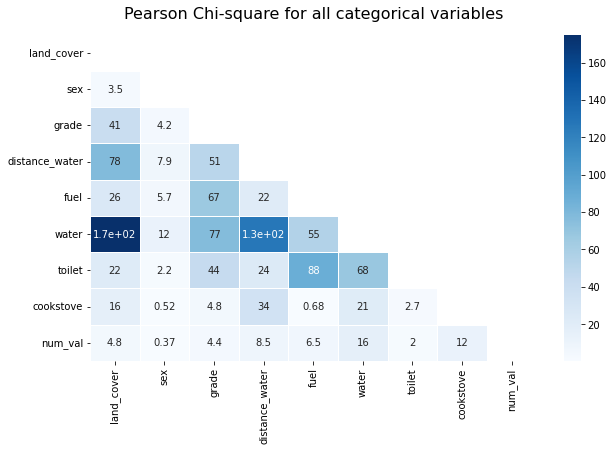

In [163]:
#Plot chi2

plt.figure(figsize=(10, 6))

mapa = sb.heatmap(chi2, 
            xticklabels=chi2.columns,
            yticklabels=chi2.columns,
            mask = np.triu(np.ones_like(chi2, dtype=bool)),
            cmap='Blues',
            annot=True,
            linewidth=0.5)

mapa.set_title('Pearson Chi-square for all categorical variables', fontdict={'fontsize':16}, pad=16); #This semicolon prevents a message to appear 
plt.savefig('heatmap_categorical_chi2.jpg', dpi=500, bbox_inches='tight')

In [164]:
#Get p-values

p_values = np.array(p_values).reshape((9,9)) # shape it as a matrix
p_values = pd.DataFrame(p_values, index=categorical_data.columns.values, columns=categorical_data.columns.values) # then a df for convenience
p_values

,land_cover,sex,grade,distance_water,fuel,water,toilet,cookstove,num_val
land_cover,0.0000,0.6189,0.0034,0.0000,0.1725,0.0000,0.0999,0.0063,0.4347
sex,0.6189,0.0000,0.3737,0.1641,0.2197,0.1881,0.5380,0.4690,0.5455
grade,0.0034,0.3737,0.0000,0.0002,0.0000,0.0001,0.0000,0.3033,0.3522
distance_water,0.0000,0.1641,0.0002,0.0000,0.3352,0.0000,0.0714,0.0000,0.1296
fuel,0.1725,0.2197,0.0000,0.3352,0.0000,0.0213,0.0000,0.9543,0.1646
water,0.0000,0.1881,0.0001,0.0000,0.0213,0.0000,0.0000,0.0109,0.0607
toilet,0.0999,0.5380,0.0000,0.0714,0.0000,0.0000,0.0000,0.4481,0.5715
cookstove,0.0063,0.4690,0.3033,0.0000,0.9543,0.0109,0.4481,0.0000,0.0005
num_val,0.4347,0.5455,0.3522,0.1296,0.1646,0.0607,0.5715,0.0005,0.0000


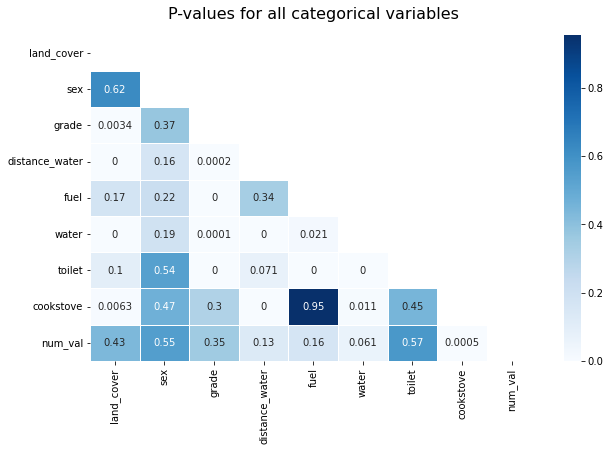

In [165]:
#Plot p-values

plt.figure(figsize=(10, 6))

mapa = sb.heatmap(p_values, 
            xticklabels=p_values.columns,
            yticklabels=p_values.columns,
            mask = np.triu(np.ones_like(p_values, dtype=bool)),
            cmap='Blues',
            annot=True,
            linewidth=0.5)

mapa.set_title('P-values for all categorical variables', fontdict={'fontsize':16}, pad=16); #This semicolon prevents a message to appear 
plt.savefig('heatmap_categorical_pvalues.jpg', dpi=500, bbox_inches='tight')

In [166]:
#Get the Cramer's V coefficient

cramers = np.array(cramers).reshape((9,9)) # shape it as a matrix
cramers = pd.DataFrame(cramers, index=categorical_data.columns.values, columns=categorical_data.columns.values) # then a df for convenience
cramers

,land_cover,sex,grade,distance_water,fuel,water,toilet,cookstove,num_val
land_cover,0.0000,0.1332,0.2278,0.2799,0.1800,0.4192,0.1933,0.2853,0.1561
sex,0.1332,0.0000,0.1461,0.1987,0.1698,0.2503,0.1044,0.0513,0.0429
grade,0.2278,0.1461,0.0000,0.2523,0.2899,0.3115,0.2715,0.1561,0.1490
distance_water,0.2799,0.1987,0.2523,0.0000,0.1666,0.3568,0.1990,0.4149,0.2070
fuel,0.1800,0.1698,0.2899,0.1666,0.0000,0.2633,0.3844,0.0583,0.1808
water,0.4192,0.2503,0.3115,0.3568,0.2633,0.0000,0.3371,0.3282,0.2863
toilet,0.1933,0.1044,0.2715,0.1990,0.3844,0.3371,0.0000,0.1155,0.1004
cookstove,0.2853,0.0513,0.1561,0.4149,0.0583,0.3282,0.1155,0.0000,0.2456
num_val,0.1561,0.0429,0.1490,0.2070,0.1808,0.2863,0.1004,0.2456,0.0000


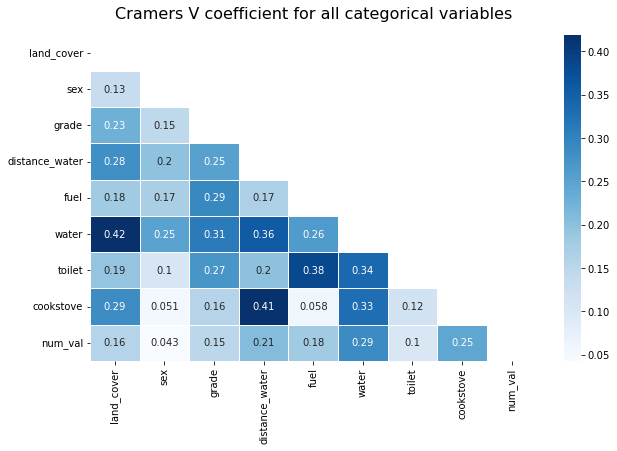

In [167]:
#Plot Cramer's V coefficient

plt.figure(figsize=(10, 6))

mapa = sb.heatmap(cramers, 
            xticklabels=cramers.columns,
            yticklabels=cramers.columns,
            mask = np.triu(np.ones_like(cramers, dtype=bool)),
            cmap='Blues',
            annot=True,
            linewidth=0.5)

mapa.set_title('Cramers V coefficient for all categorical variables', fontdict={'fontsize':16}, pad=16); #This semicolon prevents a message to appear 
plt.savefig('heatmap_categorical_cramer.jpg', dpi=500, bbox_inches='tight')

# Numerical and Categorical Parameters (with num_val/cookstove) - Correlation

In [168]:
#numerical_data_norm.dtypes
#categorical_data.dtypes
#categorical_data_2.dtypes

In [169]:
num_val                             = data['num_val'].tolist()
cookstove                           = data['cookstove'].tolist()
toilet_type_list                    = data['toilet_type'].tolist()
water_source_list                   = data['water_source'].tolist()
type_of_fuel_list                   = data['type_of_fuel'].tolist()
distance_fetch_water_one_way_list   = data['distance_fetch_water_one_way'].tolist()
highest_grade_completed_list        = data['highest_grade_completed'].tolist()
sex_list                            = data['sex'].tolist()
land_cover_list                     = data['Land Cover'].tolist()

In [170]:
categorical_data_2 = pd.DataFrame(num_val, columns = ['num_val'])
categorical_data_2.insert(0, 'cookstove', cookstove)
categorical_data_2.insert(0, 'toilet', toilet_type_list)
categorical_data_2.insert(0, 'water', water_source_list)
categorical_data_2.insert(0, 'fuel', type_of_fuel_list)
categorical_data_2.insert(0, 'distance_water', distance_fetch_water_one_way_list)
categorical_data_2.insert(0, 'grade', highest_grade_completed_list)
categorical_data_2.insert(0, 'sex', sex_list)
categorical_data_2.insert(0, 'land_cover', land_cover_list)

categorical_data_2

,land_cover,sex,grade,distance_water,fuel,water,toilet,cookstove,num_val
0,40,0,1,4,3,9,5,1,1
1,50,0,1,4,1,1,2,1,1
2,50,0,2,6,1,3,2,0,1
3,40,0,2,6,3,1,2,0,1
4,50,1,4,5,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...
194,30,0,1,5,1,3,2,0,0
195,20,0,1,5,1,3,2,0,1
196,50,0,2,6,1,1,2,0,1
197,126,1,0,3,1,7,1,0,0


In [171]:
# Convert all columns into categorical variables

#VALUES
categorical_data_2["num_val"] = categorical_data["num_val"].astype("category")
categorical_data_2["cookstove"] = categorical_data["cookstove"].astype("category")

categorical_data_2["toilet"] = categorical_data["toilet"].astype("category")
categorical_data_2["water"] = categorical_data["water"].astype("category")
categorical_data_2["fuel"] = categorical_data["fuel"].astype("category")
categorical_data_2["distance_water"] = categorical_data["distance_water"].astype("category")
categorical_data_2["grade"] = categorical_data["grade"].astype("category")
categorical_data_2["sex"] = categorical_data["sex"].astype("category")
categorical_data_2["land_cover"] = categorical_data["land_cover"].astype("category")

In [172]:
# Convert all columns into float64 again

categorical_data_2["toilet"] = categorical_data["toilet"].astype("float64")
categorical_data_2["water"] = categorical_data["water"].astype("float64")
categorical_data_2["fuel"] = categorical_data["fuel"].astype("float64")
categorical_data_2["distance_water"] = categorical_data["distance_water"].astype("float64")
categorical_data_2["grade"] = categorical_data["grade"].astype("float64")
categorical_data_2["sex"] = categorical_data["sex"].astype("float64")
categorical_data_2["land_cover"] = categorical_data["land_cover"].astype("float64")

categorical_data_2["num_val"] = categorical_data["num_val"].astype("float64")
categorical_data_2["cookstove"] = categorical_data["cookstove"].astype("float64")

In [173]:
num_cate = pd.concat([numerical_data_norm, categorical_data_2], axis=1)
num_cate

,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,transmission,...,members_house,land_cover,sex,grade,distance_water,fuel,water,toilet,cookstove,num_val
0,0.186985,0.118218,0.328202,0.285472,0.498311,0.498688,0.140796,0.360592,0.100563,0.149200,...,0.117647,40.0,0.0,1.0,4.0,3.0,9.0,5.0,1.0,1.0
1,0.241730,1.000000,0.840992,0.331482,0.119031,0.000000,0.567061,1.000000,0.215052,0.481820,...,0.176471,50.0,0.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0
2,1.000000,0.000000,0.714594,0.110972,0.057162,0.137135,0.000000,0.000000,0.254697,0.394831,...,0.176471,50.0,0.0,2.0,6.0,1.0,3.0,2.0,0.0,1.0
3,0.045416,0.146384,0.231321,0.171018,0.168361,0.257010,0.063711,0.238637,0.001509,0.000000,...,0.411765,40.0,0.0,2.0,6.0,3.0,1.0,2.0,0.0,1.0
4,0.355643,0.101878,0.064511,0.319828,0.085626,0.702228,0.321310,0.722815,0.033745,0.023504,...,0.529412,50.0,1.0,4.0,5.0,3.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.854847,0.262508,0.010697,0.460605,0.201809,1.000000,0.439255,0.165103,0.092659,0.189688,...,0.176471,30.0,0.0,1.0,5.0,1.0,3.0,2.0,0.0,0.0
195,0.094514,0.074970,0.161029,0.313649,0.127262,0.649390,0.380445,0.727434,0.046046,0.158278,...,0.235294,20.0,0.0,1.0,5.0,1.0,3.0,2.0,0.0,1.0
196,0.034888,0.115455,0.005541,0.335311,0.177492,0.652656,0.119670,0.003707,0.008183,0.189798,...,0.470588,50.0,0.0,2.0,6.0,1.0,1.0,2.0,0.0,1.0
197,0.285037,0.083565,0.527377,0.367126,0.334708,0.036128,0.579234,0.000000,0.655243,0.773599,...,0.294118,126.0,1.0,0.0,3.0,1.0,7.0,1.0,0.0,0.0


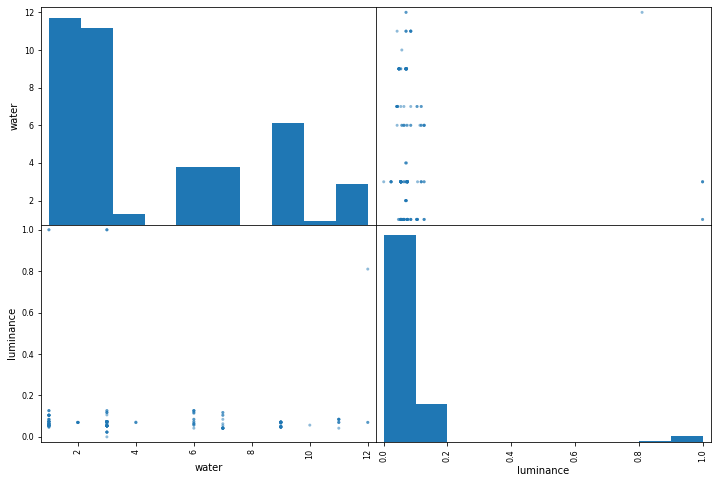

In [174]:
attributessss= num_cate[['water','luminance']].copy()
pd.plotting.scatter_matrix(attributessss, alpha=0.5, figsize=(12, 8));

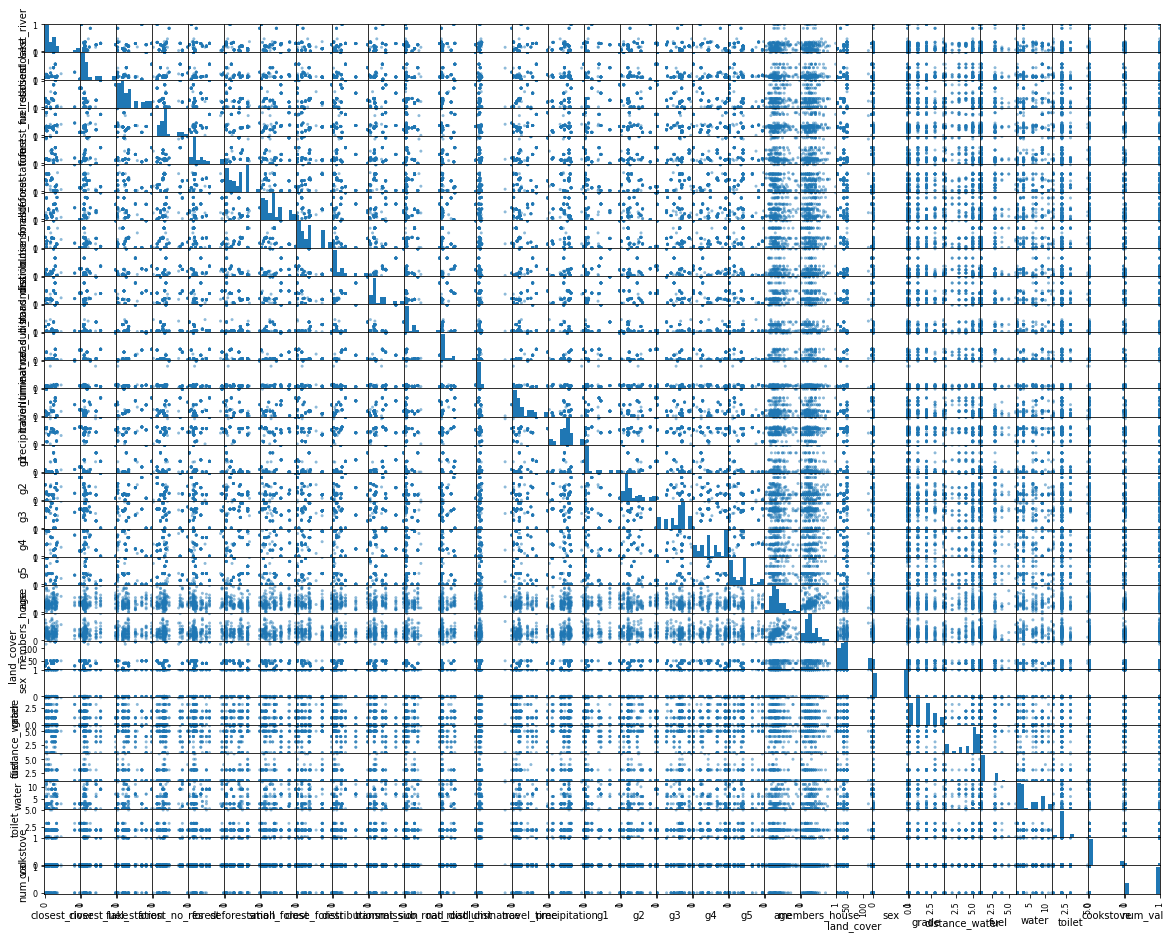

In [175]:
attributessss= num_cate[['closest_river','closest_lake','fuel_station', 'forest_no_res', 'forest','deforestation',
                         'small_forest','close_forest','distribution',
            'transmission','nat_sub_road_dist','nat_road_dist','luminance','travel_time','precipitation',
            'g1','g2','g3','g4','g5','age','members_house','land_cover','sex','grade','distance_water','fuel','water',
            'toilet','cookstove','num_val']].copy()
pd.plotting.scatter_matrix(attributessss, alpha=0.5, figsize=(20, 16));

In [176]:
num_cate.dtypes

closest_river        float64
closest_lake         float64
fuel_station         float64
forest_no_res        float64
forest               float64
deforestation        float64
small_forest         float64
close_forest         float64
distribution         float64
transmission         float64
nat_sub_road_dist    float64
nat_road_dist        float64
luminance            float64
travel_time          float64
precipitation        float64
g1                   float64
g2                   float64
g3                   float64
g4                   float64
g5                   float64
age                  float64
members_house        float64
land_cover           float64
sex                  float64
grade                float64
distance_water       float64
fuel                 float64
water                float64
toilet               float64
cookstove            float64
num_val              float64
dtype: object

In [177]:
num_cate.select_dtypes(include='float64').columns.tolist()

['closest_river',
 'closest_lake',
 'fuel_station',
 'forest_no_res',
 'forest',
 'deforestation',
 'small_forest',
 'close_forest',
 'distribution',
 'transmission',
 'nat_sub_road_dist',
 'nat_road_dist',
 'luminance',
 'travel_time',
 'precipitation',
 'g1',
 'g2',
 'g3',
 'g4',
 'g5',
 'age',
 'members_house',
 'land_cover',
 'sex',
 'grade',
 'distance_water',
 'fuel',
 'water',
 'toilet',
 'cookstove',
 'num_val']

In [178]:
num_cate.select_dtypes(include=['category']).columns.tolist()
#num_cate.select_dtypes(include=['object'])

[]

In [179]:
num_cate

,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,transmission,...,members_house,land_cover,sex,grade,distance_water,fuel,water,toilet,cookstove,num_val
0,0.186985,0.118218,0.328202,0.285472,0.498311,0.498688,0.140796,0.360592,0.100563,0.149200,...,0.117647,40.0,0.0,1.0,4.0,3.0,9.0,5.0,1.0,1.0
1,0.241730,1.000000,0.840992,0.331482,0.119031,0.000000,0.567061,1.000000,0.215052,0.481820,...,0.176471,50.0,0.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0
2,1.000000,0.000000,0.714594,0.110972,0.057162,0.137135,0.000000,0.000000,0.254697,0.394831,...,0.176471,50.0,0.0,2.0,6.0,1.0,3.0,2.0,0.0,1.0
3,0.045416,0.146384,0.231321,0.171018,0.168361,0.257010,0.063711,0.238637,0.001509,0.000000,...,0.411765,40.0,0.0,2.0,6.0,3.0,1.0,2.0,0.0,1.0
4,0.355643,0.101878,0.064511,0.319828,0.085626,0.702228,0.321310,0.722815,0.033745,0.023504,...,0.529412,50.0,1.0,4.0,5.0,3.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.854847,0.262508,0.010697,0.460605,0.201809,1.000000,0.439255,0.165103,0.092659,0.189688,...,0.176471,30.0,0.0,1.0,5.0,1.0,3.0,2.0,0.0,0.0
195,0.094514,0.074970,0.161029,0.313649,0.127262,0.649390,0.380445,0.727434,0.046046,0.158278,...,0.235294,20.0,0.0,1.0,5.0,1.0,3.0,2.0,0.0,1.0
196,0.034888,0.115455,0.005541,0.335311,0.177492,0.652656,0.119670,0.003707,0.008183,0.189798,...,0.470588,50.0,0.0,2.0,6.0,1.0,1.0,2.0,0.0,1.0
197,0.285037,0.083565,0.527377,0.367126,0.334708,0.036128,0.579234,0.000000,0.655243,0.773599,...,0.294118,126.0,1.0,0.0,3.0,1.0,7.0,1.0,0.0,0.0


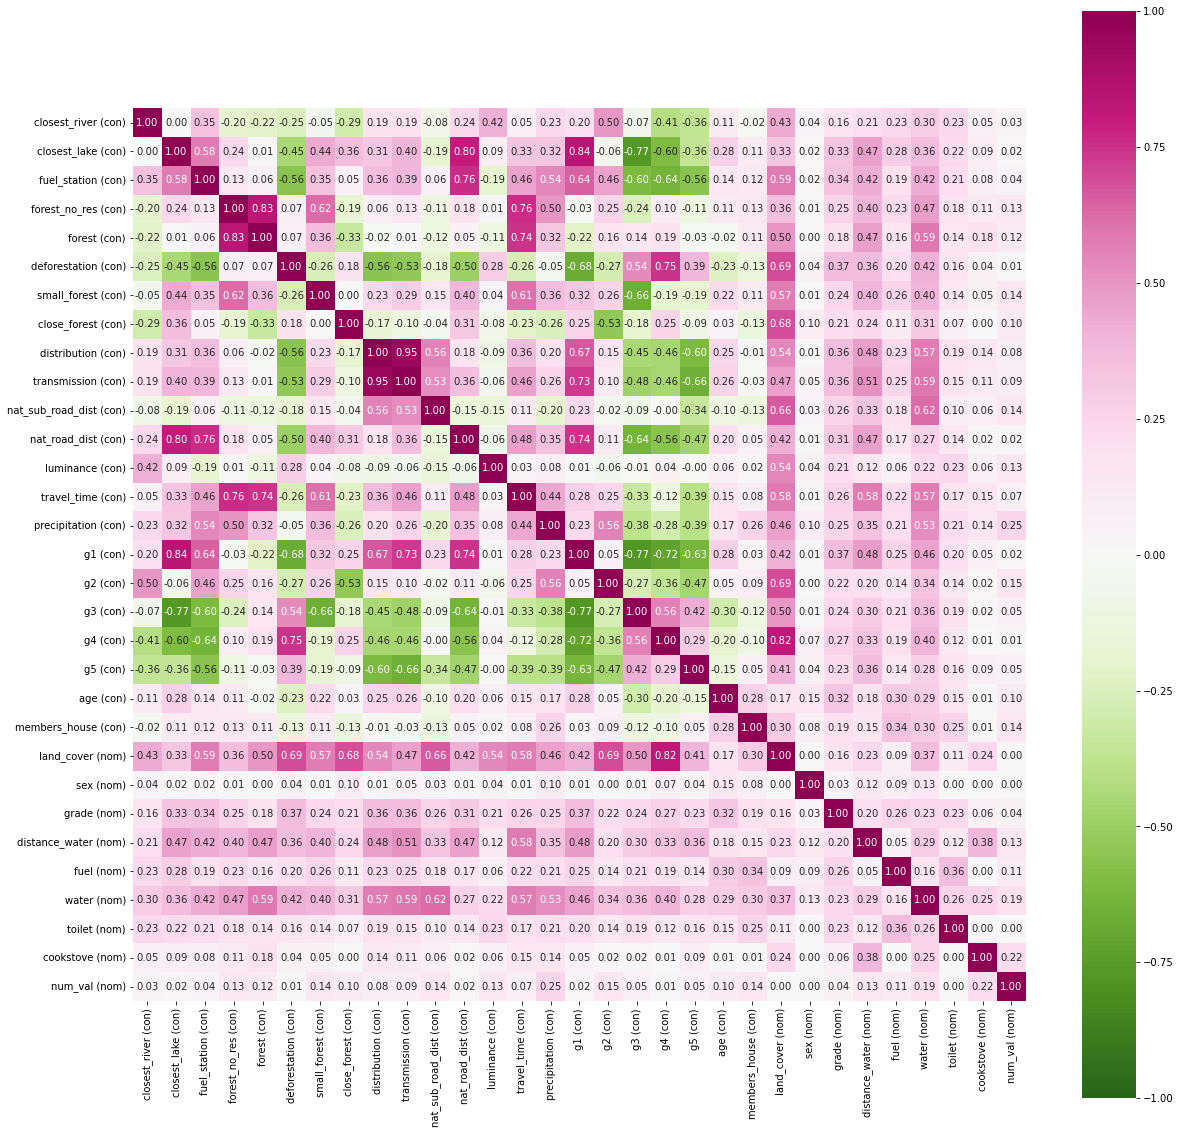

<Figure size 432x288 with 0 Axes>

In [180]:
#http://shakedzy.xyz/dython/modules/nominal/
#https://www.kaggle.com/questions-and-answers/181332

associations(num_cate,
             figsize=(20,20),
             nominal_columns=['land_cover','sex', 'grade', 'distance_water', 'fuel', 'water', 
                              'toilet', 'radio', 'tv','newspaper', 'internet', 'cookstove','num_val'], 
             nom_num_assoc='correlation_ratio',
             cmap='PiYG_r',
             mark_columns=True);
plt.savefig('heatmap_num_cate.jpg', dpi=500, bbox_inches='tight')

In [181]:
data2 = pd.read_excel("mydata1.xlsx")
data2 = data2.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
data2

,closest_river,closest_lake,fuel_station,forest_no_res,forest,deforestation,small_forest,close_forest,distribution,transmission,...,Water_piped_internal,Water_piped_public_free,Water_piped_public_paid,Water_piped_tap_outside,Water_protected_spring,Water_river-stream,Toilet_community,Toilet_flush,Toilet_none-fields,Toilet_pit_latrine
0,0.186985,0.118218,0.328202,0.285472,0.498311,0.498688,0.140796,0.360592,0.100563,0.149200,...,0,0,0,0,0,1,0,0,1,0
1,0.241730,1.000000,0.840992,0.331482,0.119031,0.000000,0.567061,1.000000,0.215052,0.481820,...,0,1,0,0,0,0,0,0,0,1
2,1.000000,0.000000,0.714594,0.110972,0.057162,0.137135,0.000000,0.000000,0.254697,0.394831,...,1,0,0,0,0,0,0,0,0,1
3,0.045416,0.146384,0.231321,0.171018,0.168361,0.257010,0.063711,0.238637,0.001509,0.000000,...,0,1,0,0,0,0,0,0,0,1
4,0.355643,0.101878,0.064511,0.319828,0.085626,0.702228,0.321310,0.722815,0.033745,0.023504,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.854847,0.262508,0.010697,0.460605,0.201809,1.000000,0.439255,0.165103,0.092659,0.189688,...,1,0,0,0,0,0,0,0,0,1
195,0.094514,0.074970,0.161029,0.313649,0.127262,0.649390,0.380445,0.727434,0.046046,0.158278,...,1,0,0,0,0,0,0,0,0,1
196,0.034888,0.115455,0.005541,0.335311,0.177492,0.652656,0.119670,0.003707,0.008183,0.189798,...,0,1,0,0,0,0,0,0,0,1
197,0.285037,0.083565,0.527377,0.367126,0.334708,0.036128,0.579234,0.000000,0.655243,0.773599,...,0,0,0,0,0,0,0,1,0,0


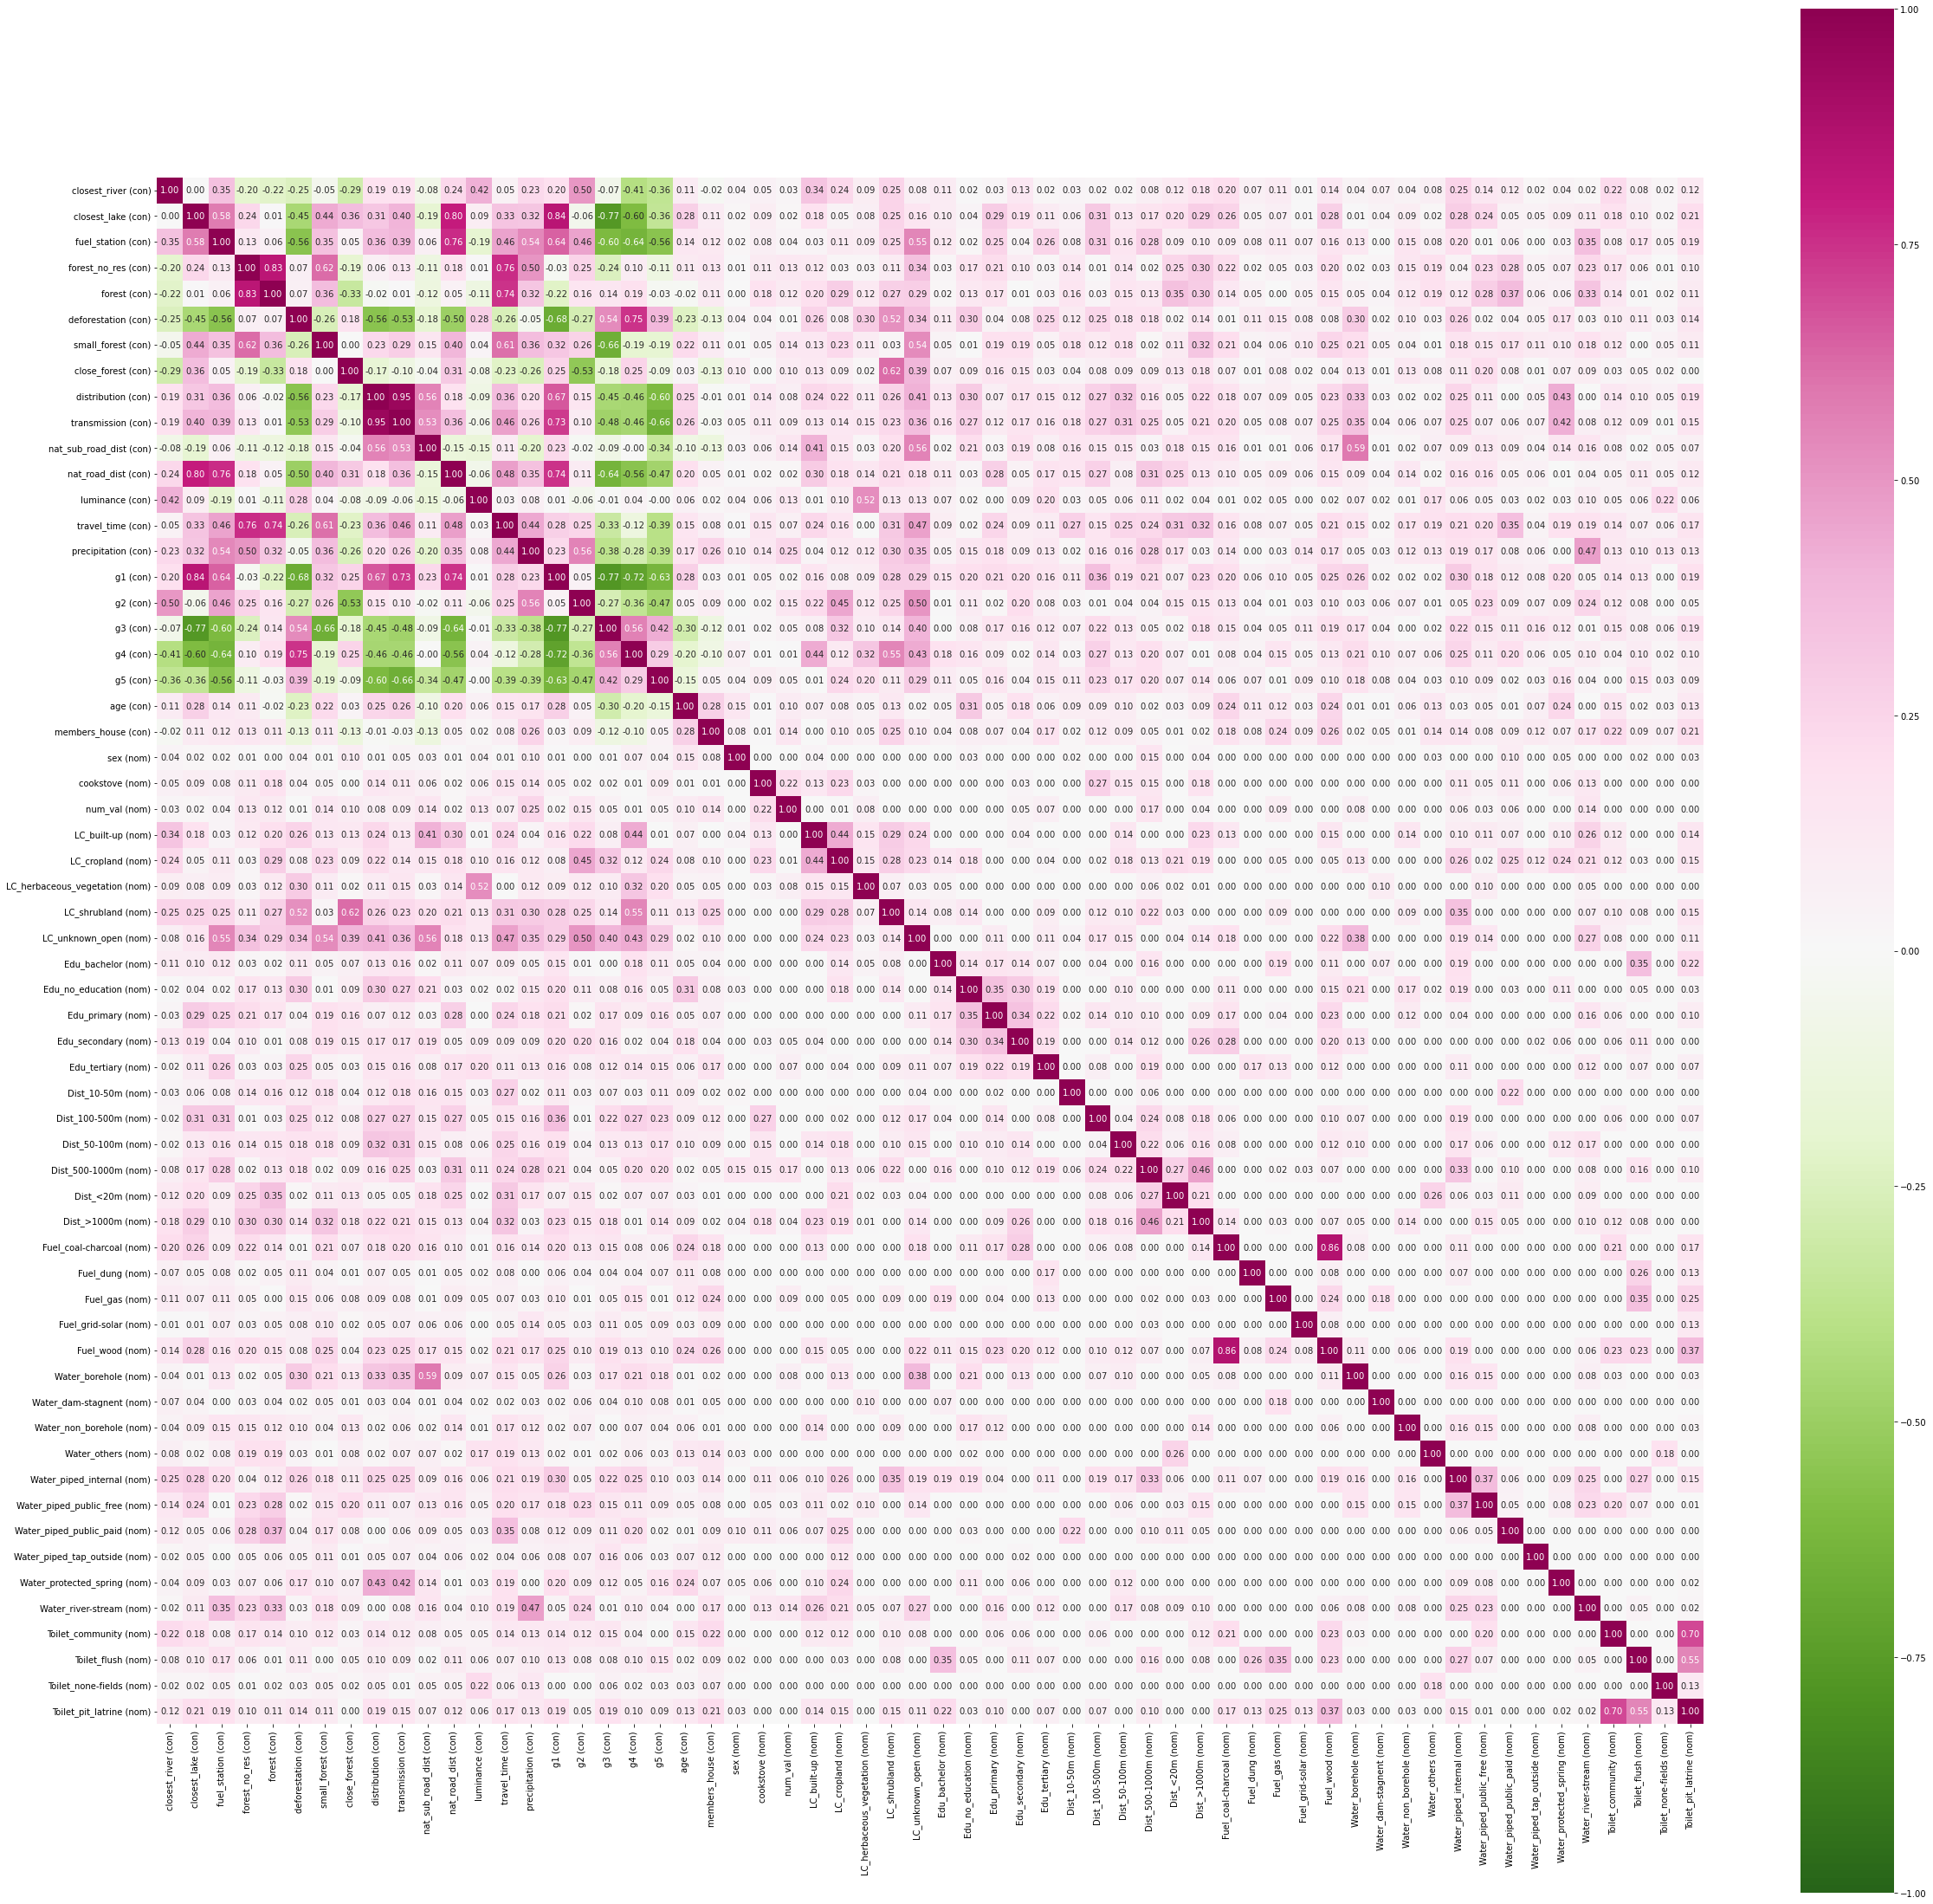

<Figure size 432x288 with 0 Axes>

In [182]:
associations(data2,
             figsize=(40,40),
             nominal_columns=['sex', 'LC_built-up', 'LC_cropland', 'LC_herbaceous_vegetation',
                              'LC_shrubland', 'LC_unknown_open', 'Edu_bachelor', 'Edu_no_education', 'Edu_primary', 
                              'Edu_secondary', 'Edu_tertiary', 'Dist_10-50m', 'Dist_100-500m', 'Dist_50-100m', 
                              'Dist_500-1000m', 'Dist_<20m', 'Dist_>1000m', 'Fuel_coal-charcoal', 'Fuel_dung', 'Fuel_gas', 
                              'Fuel_grid-solar', 'Fuel_wood', 'Water_borehole', 'Water_dam-stagnent', 'Water_non_borehole', 
                              'Water_others', 'Water_piped_internal', 'Water_piped_public_free', 'Water_piped_public_paid', 
                              'Water_piped_tap_outside', 'Water_protected_spring', 'Water_river-stream', 'Toilet_community', 
                              'Toilet_flush', 'Toilet_none-fields', 'Toilet_pit_latrine', 'cookstove','num_val'], 
             nom_num_assoc='correlation_ratio',
             cmap='PiYG_r',
             mark_columns=True);
plt.savefig('heatmap_num_cate.jpg', dpi=500, bbox_inches='tight')


#'closest_river', 'closest_lake', 'fuel_station', 'forest_no_res', 'forest', 'deforestation', 'small_forest', 'close_forest',
# 'distribution', 'transmission', 'nat_sub_road_dist', 'nat_road_dist', 'luminance', 'travel_time', 'precipitation',
# 'g1', 'g2', 'g3', 'g4', 'g5', 'age', 'members_house', 'sex', 'LC_built-up', 'LC_cropland', 'LC_herbaceous_vegetation',
# 'LC_shrubland', 'LC_unknown_open', 'Edu_bachelor', 'Edu_no_education', 'Edu_primary', 'Edu_secondary', 'Edu_tertiary',
# 'Dist_10-50m', 'Dist_100-500m', 'Dist_50-100m', 'Dist_500-1000m', 'Dist_<20m', 'Dist_>1000m', 'Fuel_coal-charcoal',
# 'Fuel_dung', 'Fuel_gas', 'Fuel_grid-solar', 'Fuel_wood', 'Water_borehole', 'Water_dam-stagnent', 'Water_non_borehole', 
#'Water_others', 'Water_piped_internal', 'Water_piped_public_free', 'Water_piped_public_paid', 'Water_piped_tap_outside',
# 'Water_protected_spring', 'Water_river-stream', 'Toilet_community', 'Toilet_flush', 'Toilet_none-fields',
# 'Toilet_pit_latrine'

# ---------------------------------------------------------------------------------------------------------------

In [255]:
data_all = pd.read_excel("00._v3_Observations_-_to_normalize (play with ages).xlsx", sheet_name="All")
data_0 = pd.read_excel("00._v3_Observations_-_to_normalize (play with ages).xlsx", sheet_name="Cook0")
data_1 = pd.read_excel("00._v3_Observations_-_to_normalize (play with ages).xlsx", sheet_name="Cook1")

data_1
#Para data_all, data_0 y data_1 hay que descontar 1 en el primer bin ya que se puso un '10'
#Para data_0, hay que descontar 1 en el ultimo bin ya que se puso un '80'

,Unnamed: 0,index,Interview ID,cookstove,Village,lat,long,"long,lat",age,sex,...,Luminance Band 1,Travel Time (min),Precipitation (mm),DHS Cluster,Q1,Q2,Q3,Q4,Q5,num_val
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,12.0,6064593ca2237b3f546900e5,1.0,Mabwe,0.595131,30.153128,"(30.15312827, 0.5951310726)",20,2.0,...,15.0,24.0,1482.106567,532.0,0.000000,0.107143,0.357143,0.321429,0.214286,1.0
2,13.0,13.0,60645899a2237b3f5468fa01,1.0,Mabwe,0.595131,30.153128,"(30.15312827, 0.5951310726)",26,2.0,...,15.0,24.0,1482.106567,532.0,0.000000,0.107143,0.357143,0.321429,0.214286,1.0
3,1.0,1.0,606459aea2237b3f546905ed,1.0,Gwere,3.267508,33.208864,"(33.20886406, 3.267508412)",26,2.0,...,19.0,49.0,1432.603027,392.0,0.962963,0.037037,0.000000,0.000000,0.000000,1.0
4,24.0,24.0,60d06f7ddefc3909beb589d9,1.0,Kasese Municipal council,0.169900,30.078100,"(30.0781, 0.1699)",27,1.0,...,20.0,0.0,1003.117432,560.0,0.055556,0.333333,0.277778,0.194444,0.138889,1.0
5,3.0,3.0,606458d3a2237b3f5468fc80,1.0,Okabi,3.125250,30.848807,"(30.84880735, 3.125250327)",29,1.0,...,16.0,21.0,1345.285400,440.0,0.689655,0.103448,0.103448,0.103448,0.000000,1.0
6,15.0,15.0,60645a05a2237b3f546909a9,1.0,Mabwe,0.595131,30.153128,"(30.15312827, 0.5951310726)",30,1.0,...,15.0,24.0,1482.106567,532.0,0.000000,0.107143,0.357143,0.321429,0.214286,1.0
7,22.0,22.0,60d06f61defc3909beb589b7,1.0,Ibonde,0.589700,30.254900,"(30.2549, 0.5897)",31,2.0,...,12.0,10.0,1247.092651,557.0,0.000000,0.107143,0.250000,0.428571,0.214286,1.0
8,0.0,0.0,60645a4ea2237b3f54690cef,1.0,Bwindi,-0.968263,29.617223,"(29.61722332, -0.9682629102)",32,1.0,...,14.0,119.0,1480.652222,622.0,0.000000,0.125000,0.250000,0.437500,0.187500,1.0
9,21.0,21.0,60d06f4cdefc3909beb58992,1.0,Kasenda,0.589700,30.254900,"(30.2549, 0.5897)",32,1.0,...,12.0,10.0,1247.092651,557.0,0.000000,0.107143,0.250000,0.428571,0.214286,1.0


<AxesSubplot:>

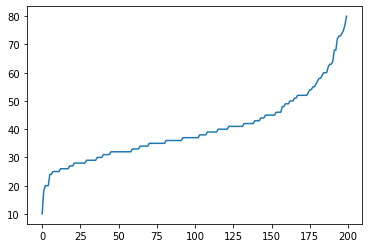

In [256]:
data_all['age'].plot()

[ 2 34 79 47 22  9  7]


array([0.01 , 0.17 , 0.395, 0.235, 0.11 , 0.045, 0.035])

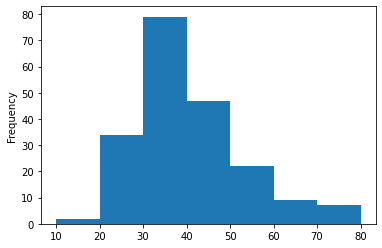

In [257]:
data_all['age'].plot(kind = 'hist', bins=7)
counts, bin_edges = np.histogram(data_all['age'], bins=7)
print(counts)
#print(bin_edges) 200 (deberia ser 199 (menos la observacion mala) porque tiene un 10 al inicio)
proportion_all = counts/200
proportion_all

[ 2 29 67 42 21  9  5]


array([0.01142857, 0.16571429, 0.38285714, 0.24      , 0.12      ,
       0.05142857, 0.02857143])

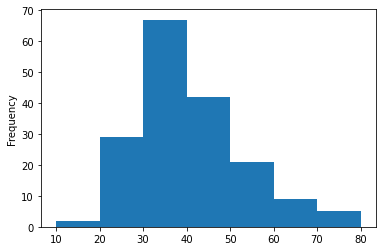

In [258]:
data_0['age'].plot(kind = 'hist', bins=7)
counts0, bin_edges0 = np.histogram(data_0['age'], bins=7)
print(counts0)
proportion_0 = counts0/175
proportion_0
#print(bin_edges0)176 () (deberia ser 173 (menos la observacion mala) porque tiene un 10 y un 80 al inicio y al final)

[ 1  5 12  5  1  0  3]


array([0.03703704, 0.18518519, 0.44444444, 0.18518519, 0.03703704,
       0.        , 0.11111111])

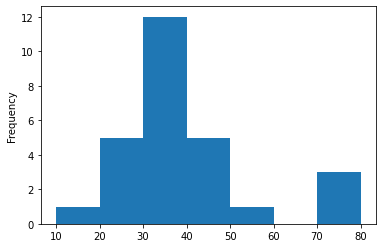

In [259]:
data_1['age'].plot(kind = 'hist', bins=7)
counts1, bin_edges1 = np.histogram(data_1['age'], bins=7)
print(counts1)
proportion_1 = counts1/27
proportion_1
#print(bin_edges1)27  (deberia ser 26 porque tiene un 10 al inicio)

In [266]:
#Between 0 and 1
arr1 = proportion_0
arr2 = proportion_1

number_bins =100
#import numpy as np
#def OVL_two_random_arr(arr1, arr2, number_bins):
    # Determine the range over which the integration will occur
min_value = np.min((arr1.min(), arr2.min()))
print(min_value)
max_value = np.min((arr1.max(), arr2.max()))
print(max_value)
    # Determine the bin width
bin_width = (max_value-min_value)/number_bins
print(bin_width)
    #For each bin, find min frequency
lower_bound = min_value #Lower bound of the first bin is the min_value of both arrays
min_arr = np.empty(number_bins) #Array that will collect the min frequency in each bin
for b in range(number_bins):
    higher_bound = lower_bound + bin_width #Set the higher bound for the bin
        #Determine the share of samples in the interval
    freq_arr1 = np.ma.masked_where((arr1<lower_bound)|(arr1>=higher_bound), arr1).count()/len(arr1)
    freq_arr2 = np.ma.masked_where((arr2<lower_bound)|(arr2>=higher_bound), arr2).count()/len(arr2)
        #Conserve the lower frequency
    min_arr[b] = np.min((freq_arr1, freq_arr2))
    lower_bound = higher_bound #To move to the next range
min_arr.sum()  

0.0
0.38285714285714284
0.0038285714285714286


0.0

In [264]:
#Between 0 and all
arr1 = proportion_0
arr2 = proportion_all

number_bins = 7
#import numpy as np
#def OVL_two_random_arr(arr1, arr2, number_bins):
    # Determine the range over which the integration will occur
min_value = np.min((arr1.min(), arr2.min()))
print(min_value)
max_value = np.min((arr1.max(), arr2.max()))
print(max_value)
    # Determine the bin width
bin_width = (max_value-min_value)/number_bins
print(bin_width)
    #For each bin, find min frequency
lower_bound = min_value #Lower bound of the first bin is the min_value of both arrays
min_arr = np.empty(number_bins) #Array that will collect the min frequency in each bin
for b in range(number_bins):
    higher_bound = lower_bound + bin_width #Set the higher bound for the bin
        #Determine the share of samples in the interval
    freq_arr1 = np.ma.masked_where((arr1<lower_bound)|(arr1>=higher_bound), arr1).count()/len(arr1)
    freq_arr2 = np.ma.masked_where((arr2<lower_bound)|(arr2>=higher_bound), arr2).count()/len(arr2)
        #Conserve the lower frequency
    min_arr[b] = np.min((freq_arr1, freq_arr2))
    lower_bound = higher_bound #To move to the next range
min_arr.sum() 

0.01
0.38285714285714284
0.05326530612244897


0.5714285714285714

In [265]:
#Between 1 and all
arr1 = proportion_1
arr2 = proportion_all

number_bins = 7
#import numpy as np
#def OVL_two_random_arr(arr1, arr2, number_bins):
    # Determine the range over which the integration will occur
min_value = np.min((arr1.min(), arr2.min()))
print(min_value)
max_value = np.min((arr1.max(), arr2.max()))
print(max_value)
    # Determine the bin width
bin_width = (max_value-min_value)/number_bins
print(bin_width)
    #For each bin, find min frequency
lower_bound = min_value #Lower bound of the first bin is the min_value of both arrays
min_arr = np.empty(number_bins) #Array that will collect the min frequency in each bin
for b in range(number_bins):
    higher_bound = lower_bound + bin_width #Set the higher bound for the bin
        #Determine the share of samples in the interval
    freq_arr1 = np.ma.masked_where((arr1<lower_bound)|(arr1>=higher_bound), arr1).count()/len(arr1)
    freq_arr2 = np.ma.masked_where((arr2<lower_bound)|(arr2>=higher_bound), arr2).count()/len(arr2)
        #Conserve the lower frequency
    min_arr[b] = np.min((freq_arr1, freq_arr2))
    lower_bound = higher_bound #To move to the next range
min_arr.sum() 

0.0
0.395
0.05642857142857143


0.7142857142857142